In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Reading the dataset and analysis

In [2]:
data = pd.read_csv("Admission_Predict.csv")

In [4]:
data.drop(["SerialNo."], axis=1, inplace=True)

In [5]:
data.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,CA
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.tail()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,CA
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67
399,333,117,4,5.0,4.0,9.66,1,0.95


In [7]:
data.describe()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,CA
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GREScore          400 non-null    int64  
 1   TOEFLScore        400 non-null    int64  
 2   UniversityRating  400 non-null    int64  
 3   SOP               400 non-null    float64
 4   LOR               400 non-null    float64
 5   CGPA              400 non-null    float64
 6   Research          400 non-null    int64  
 7   CA                400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


Checking for null values

In [9]:
data.isnull().sum() 

GREScore            0
TOEFLScore          0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
CA                  0
dtype: int64

#Data visualization


CGPA vs GREScore


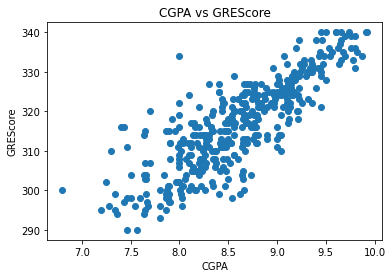

In [13]:
plt.scatter(data['CGPA'],data['GREScore'])
plt.title('CGPA vs GREScore')
plt.xlabel('CGPA')
plt.ylabel('GREScore')
plt.show()

SOP for CGPA

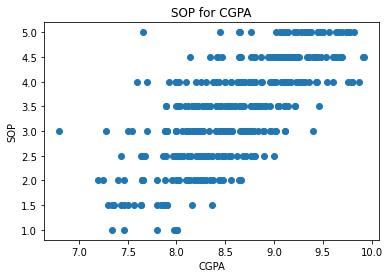

In [16]:
plt.scatter(data['CGPA'],data['SOP'])
plt.title('SOP for CGPA')
plt.xlabel('CGPA')
plt.ylabel('SOP')
plt.show()

TOEFL Score for CGPA

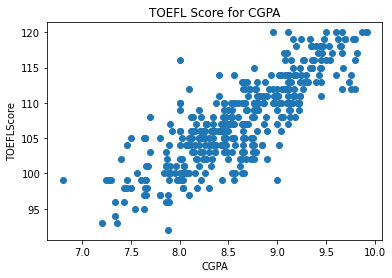

In [17]:
plt.scatter(data['CGPA'],data['TOEFLScore'])
plt.title('TOEFL Score for CGPA')
plt.xlabel('CGPA')
plt.ylabel('TOEFLScore')
plt.show()

Plotting   CGPA >=8.5 with GRE Score
& TOEFL Score 

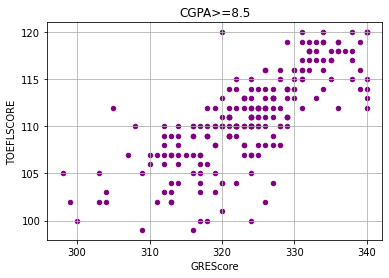

In [21]:
data[data.CGPA >= 8.5].plot(kind='scatter', x='GREScore', y='TOEFLScore',color="purple")

plt.xlabel("GREScore")
plt.ylabel("TOEFLSCORE")
plt.title("CGPA>=8.5")
plt.grid(True)

plt.show()

#GREScore frequency

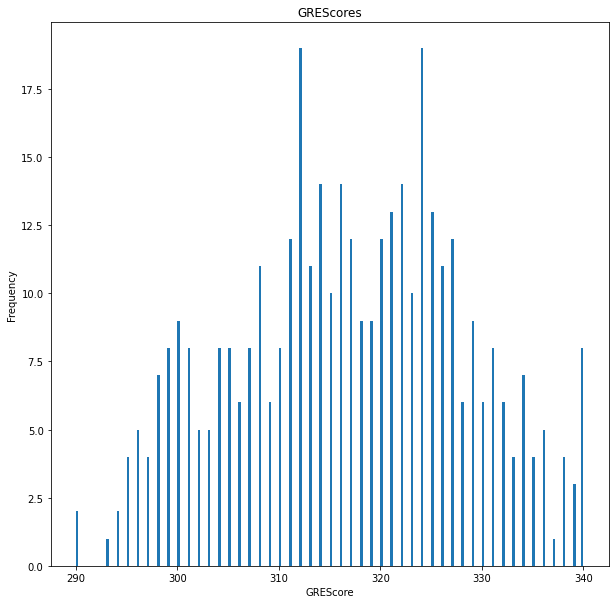

In [24]:
data["GREScore"].plot(kind = 'hist',bins = 200,figsize = (10,10))

plt.title("GREScores")
plt.xlabel("GREScore")
plt.ylabel("Frequency")

plt.show()

#TOEFL Scores

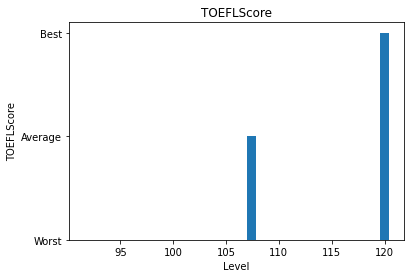

In [29]:
p = np.array([data["TOEFLScore"].min(),data["TOEFLScore"].mean(),data["TOEFLScore"].max()])
r = ["Worst","Average","Best"]
plt.bar(p,r)

plt.title("TOEFLScore")
plt.xlabel("Level")
plt.ylabel("TOEFLScore")

plt.show()

#GRE Scores

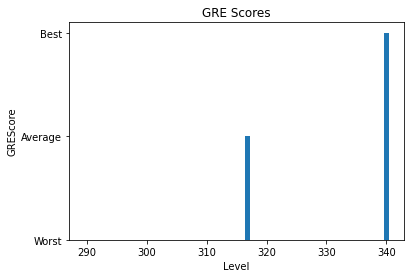

In [30]:
g = np.array([data["GREScore"].min(),data["GREScore"].mean(),data["GREScore"].max()])
h = ["Worst","Average","Best"]
plt.bar(g,h)

plt.title("GRE Scores")
plt.xlabel("Level")
plt.ylabel("GREScore")

plt.show()

#Colinearity checking

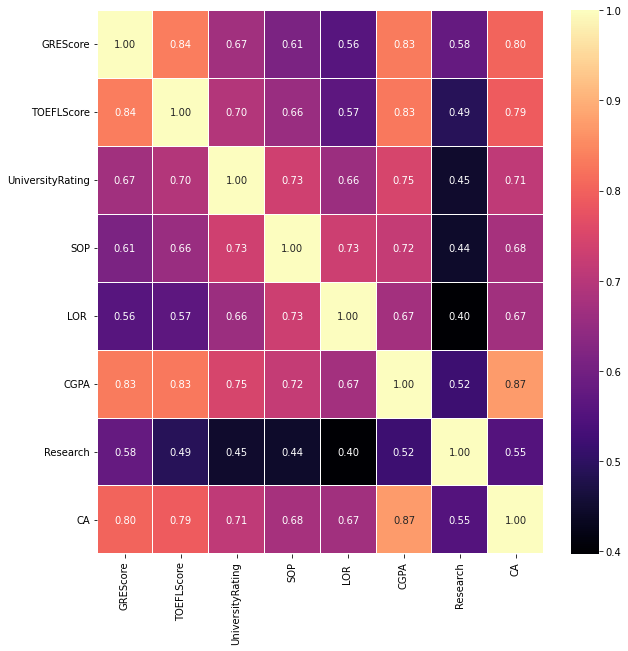

In [31]:
plt.figure(figsize=(10, 10))

sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

plt.show()

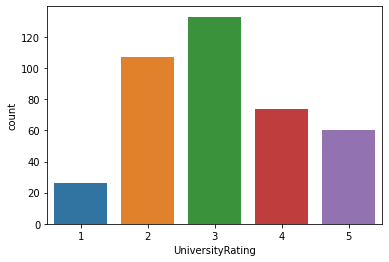

In [33]:
data.Research.value_counts()

sns.countplot(x="UniversityRating",data=data)

University Ranking

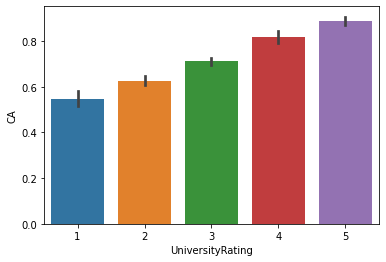

In [35]:
sns.barplot(x="UniversityRating", y="CA", data=data)

#Training & Testing the split data

In [36]:
X=data.drop(['CA'],axis=1) #input data_set
y=data['CA'] #output labels

In [37]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

#modeling and training

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_train.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
267,0.48,0.535714,0.50,0.500,0.625,0.439103,1.0
122,0.40,0.500000,0.75,0.125,0.375,0.500000,0.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
268,0.74,0.750000,0.75,0.875,1.000,0.750000,0.0
106,0.78,0.678571,0.75,0.875,0.875,0.762821,1.0


In [39]:
from sklearn.ensemble import GradientBoostingRegressor
rgr = GradientBoostingRegressor()
rgr.fit(X_train,y_train)

GradientBoostingRegressor()

In [40]:
rgr.score(X_test,y_test)

0.8078624402236428

In [41]:
y_predict=rgr.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.04371722457667203
Mean Squared Error: 0.0038064798939649183
Root Mean Squared Error: 0.0616966765228478


In [43]:
y_train = (y_train>0.5)
y_test = (y_test>0.5)

In [44]:
from sklearn.linear_model._logistic import LogisticRegression

lore = LogisticRegression(random_state=0, max_iter=1000)

lr = lore.fit(X_train, y_train)

In [45]:
y_pred = lr.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print('Accuracy Score:', accuracy_score(y_test, y_pred))  
print('Recall Score:', recall_score(y_test, y_pred))  
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('Confussion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy Score: 0.9166666666666666
Recall Score: 1.0
ROC AUC Score: 0.5833333333333333
Confussion Matrix:
 [[ 1  5]
 [ 0 54]]
